## EDA on more WB data

### Import libraries and data

In [2]:
import os
import pandas as pd
import numpy as np
import missingno as msno

cwd = os.getcwd()
parent_path = os.path.dirname(cwd)
print(parent_path)

d:\Users\Eric\Desktop\BSE\BrushUp


In [4]:
df_og = pd.read_csv(parent_path + '/brushup_2025/data/WB_extra/WB_gni_edu.csv')
df_og.shape

(1069, 16)

In [5]:
# check what series and countries are included
print(df_og['Series Name'].unique())
print(df_og['Country Name'].nunique())
df_og.sample(3)

['Primary completion rate, total (% of relevant age group)'
 'Children out of school (% of primary school age)'
 'GNI per capita, Atlas method (current US$)'
 'GNI, Atlas method (current US$)' nan
 'Data from database: World Development Indicators'
 'Last Updated: 07/01/2025']
266


,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
876,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,Grenada,GRD,273202586.086912,473787968.826052,850090266.36567,920927024.403226,970192840.098586,1066138044.05451,1089749217.78411,975574240.332142,1037337254.56756,1170574675.14704,1183421055.07733,1237016451.22648
386,Children out of school (% of primary school age),SE.PRM.UNER.ZS,Malaysia,MYS,..,0.546090006828308,4.79152870178223,4.48947525024414,3.72371673583984,2.84282875061035,4.23968172073364,3.54035997390747,3.97179961204529,4.69322156906128,1.8531641960144,..
17,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,Belarus,BLR,88.5965423583984,103.682693481445,94.0976409912109,94.376838684082,95.6138229370117,96.756591796875,99.1110763549805,95.6100616455078,93.5405120849609,93.2138977050781,92.6165313720703,..


In [6]:
df_og.describe()

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
count,1066,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064,1064
unique,6,4,266,266,584,740,816,817,810,803,811,807,811,796,676,443
top,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,Afghanistan,AFG,..,..,..,..,..,..,..,..,..,..,..,..
freq,266,266,4,4,458,293,232,232,241,243,234,245,243,258,369,610


In [7]:
df = df_og.copy()

### Quick inspection, clean and a skeaky concat

In [8]:
# use a list comprehension to quickly generate the full set of potential column headings with years to clean
cols_to_clean = [f"{year} [YR{year}]" for year in range(1990, 2025)]
print(cols_to_clean)

# create a dictionary to map the year columns from '2001 [YR2001]' to just '2001' - what does .split()[0] do?
rename_dict = {col: col.split()[0] for col in cols_to_clean if '[YR' in col}

# use rename to only change the year columns and leave the rest intact
df = df.rename(columns=rename_dict)

df.head(2)

['1990 [YR1990]', '1991 [YR1991]', '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]']


,Series Name,Series Code,Country Name,Country Code,1990,2000,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,Afghanistan,AFG,..,..,..,82.9104614257812,87.2533264160156,88.7355194091797,86.1755218505859,..,..,..,..,..
1,"Primary completion rate, total (% of relevant ...",SE.PRM.CMPT.ZS,Albania,ALB,..,..,98.7887878417969,99.5973587036133,106.449691772461,102.894180297852,98.717529296875,99.2719268798828,97.2184371948242,101.176277160645,95.1351470947266,..


In [10]:
df_pop = pd.read_csv(parent_path + '/brushup_2025/data/WB_pop_clean.csv')

# note that df_pop
print(df_pop.columns)
print(df.columns)

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code', '1990',
       '2000', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')
Index(['Series Name', 'Series Code', 'Country Name', 'Country Code', '1990',
       '2000', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')


We now have the same headings for the additional series as well as for our cleaned population data, so we can concatenate them.
https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [11]:
df_combined = pd.concat([df_pop, df], ignore_index=True)

In [12]:
df = df_combined.copy()

In [13]:
# check if any regions or 'world' included
df['Country Name'].unique()
df['Country Code'].unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA',
       'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN',
       'CYM', 'CAF', 'TCD', 'CHI', 'CHL', 'CHN', 'COL', 'COM', 'COD',
       'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'SWZ', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM',
       'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
       'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN',
       'JOR', 'KAZ', 'KEN', 'KIR', 'PRK', 'KOR', 'XKX', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT',
       'MUS', 'MEX',

In [14]:
# can you find these rows in the csv?
df.loc[df['Country Code'].isna()]

,Series Name,Series Code,Country Name,Country Code,1990,2000,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1285,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1286,Last Updated: 07/01/2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# drop any rows where the Series code is missing
df.dropna(subset=["Country Code"], inplace=True)

# drop the rows with country or world groups

country_groups = [
    "AFE", "AFW", "ARB", "CSS", "CEB", "EAR", "EAS", "EAP", "TEA", "EMU", 
    "ECS", "ECA", "TEC", "EUU", "FCS", "HPC", "HIC", "IBD", "IBT", "IDB", 
    "IDX", "IDA", "LTE", "LCN", "LAC", "TLA", "LDC", "LMY", "LIC", "LMC", 
    "MEA", "MNA", "TMN", "MIC", "NAC", "INX", "OED", "OSS", "PSS", "PST", 
    "PRE", "SST", "SAS", "TSA", "SSF", "SSA", "TSS", "UMC"]

world = ["WLD"]

to_drop = country_groups + world

df = df[~df['Country Code'].isin(to_drop)]
df.shape

(1085, 16)

### Melting and pivoting

In [21]:
# melt the data frame - you can choose to include other/ more years - and you can alter the variable and value names
year_cols = ['1990', '2000', '2015', '2020', '2022']
df_melted = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Series Name'], value_vars= year_cols, var_name='year', value_name='value')

df_melted.sample(5)

,Country Name,Country Code,Series Name,year,value
1018,Palau,PLW,"GNI, Atlas method (current US$)",1990,107190799.222109
2238,France,FRA,"Population, total",2015,66548272
1516,"Yemen, Rep.",YEM,"Primary completion rate, total (% of relevant ...",2000,..
2295,Mauritania,MRT,"Population, total",2015,3965959
1192,Kyrgyz Republic,KGZ,"Population, total",2000,4898362


In [17]:
## See questions
print(df_melted.shape)
print(df_melted['Series Name'].value_counts())
print(df_melted['year'].value_counts())

(5425, 5)
Series Name
Population, total                                           1085
Primary completion rate, total (% of relevant age group)    1085
Children out of school (% of primary school age)            1085
GNI per capita, Atlas method (current US$)                  1085
GNI, Atlas method (current US$)                             1085
Name: count, dtype: int64
year
1990    1085
2000    1085
2015    1085
2020    1085
2022    1085
Name: count, dtype: int64


In [18]:
# Why?
print(df_melted['Country Name'].nunique())
print(df_melted['Series Name'].nunique())
print(df_melted['year'].nunique())
print(217*5) # 5 years and 5 series with 217 countries

217
5
5
1085


In [23]:
# pivot the data frame - make sure to use as values whatever you chose for value_name above
# run it with and without rest_index() - what does it do?
pivoted_df = df_melted.pivot(index=['Country Name', 'Country Code', 'year'], columns='Series Name', values='value').reset_index()
print(pivoted_df.shape)
pivoted_df.sample(4)

(1085, 8)


Series Name,Country Name,Country Code,year,Children out of school (% of primary school age),"GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Population, total","Primary completion rate, total (% of relevant age group)"
764,Papua New Guinea,PNG,2022,..,2690,27493953540.0786,10203169,..
690,Nepal,NPL,1990,..,200,3921071408.57416,19524573,..
77,Bangladesh,BGD,2015,..,1200,191338510755.539,159383179,..
600,Malaysia,MYS,1990,..,2420,43233642568.4405,17833171,95.7504501342773


### Renaming

Remember: we don't like spaces...

In [24]:
df = pivoted_df.copy()

In [25]:
df.columns

Index(['Country Name', 'Country Code', 'year',
       'Children out of school (% of primary school age)',
       'GNI per capita, Atlas method (current US$)',
       'GNI, Atlas method (current US$)', 'Population, total',
       'Primary completion rate, total (% of relevant age group)'],
      dtype='object', name='Series Name')

In [26]:
# use renaming dictionary
rename_dict = {
    'Country Code' : 'isocode',
    'Country Name' : 'country',
    'Population, total': 'pop',
    #'Children out of school, primary': 'primary_out_school_total',
    'Children out of school (% of primary school age)': 'primary_out_school_pct',
    'Primary completion rate, total (% of relevant age group)': 'primary_compl_pct',
    'GNI, Atlas method (current US$)': 'gni',
    'GNI per capita, Atlas method (current US$)': 'gni_pc'
}

df.rename(columns=rename_dict, inplace=True)

df

Series Name,country,isocode,year,primary_out_school_pct,gni_pc,gni,pop,primary_compl_pct
0,Afghanistan,AFG,1990,..,..,..,12045660,..
1,Afghanistan,AFG,2000,..,..,..,20130327,..
2,Afghanistan,AFG,2015,..,590,20114103580.5321,33831764,..
3,Afghanistan,AFG,2020,..,490,19236860322.2919,39068979,..
4,Afghanistan,AFG,2022,..,370,14887595113.2198,40578842,..
...,...,...,...,...,...,...,...,...
1080,Zimbabwe,ZWE,1990,..,730,7446656126.13476,10137281,..
1081,Zimbabwe,ZWE,2000,5.86683988571167,350,4218116060.64918,11892055,..
1082,Zimbabwe,ZWE,2015,15.1633396148682,1330,19084589056.5728,14399013,90.9795455932617
1083,Zimbabwe,ZWE,2020,13.5668296813965,1690,26266212507.7385,15526888,91.8669052124023


### Converting types

In [ ]:
# what are these three print statements showing?

print(df.loc[0]['primary_out_school_pct'][0])
print(type(df.loc[0]['primary_out_school_pct'][0]))
print(type(df.loc[0]['primary_out_school_pct']))

.
<class 'str'>
<class 'str'>


In [28]:
# are you happy with the data types?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 1085 non-null   object
 1   isocode                 1085 non-null   object
 2   year                    1085 non-null   object
 3   primary_out_school_pct  1085 non-null   object
 4   gni_pc                  1085 non-null   object
 5   gni                     1085 non-null   object
 6   pop                     1085 non-null   object
 7   primary_compl_pct       1085 non-null   object
dtypes: object(8)
memory usage: 67.9+ KB


Series Name,country,isocode,year,primary_out_school_pct,gni_pc,gni,pop,primary_compl_pct
658,Mongolia,MNG,2020,4.91705894470215,3690,12271274244.8895,3327204,97.0319900512695
84,Barbados,BRB,2022,6.83245992660522,22290,6292322610.93682,282318,91.7237091064453
385,Greenland,GRL,1990,..,15690,872243893.322831,55600,..
1005,Tuvalu,TUV,1990,..,2130,18701562.0850295,8798,83.4394912719727
97,Belize,BLZ,2015,0.381480008363724,5790,2064330607.34388,356333,105.614219665527
166,Cambodia,KHM,2000,5.56607007980347,290,3672712893.92597,12462336,..
731,Northern Mariana Islands,MNP,2000,..,..,..,68356,..
561,Liberia,LBR,2000,..,190,564506401.903581,2928117,..
373,Ghana,GHA,2020,11.9552202224731,2250,71842815050.741,31887809,..
1045,Vanuatu,VUT,1990,..,1220,181235674.184787,148063,..


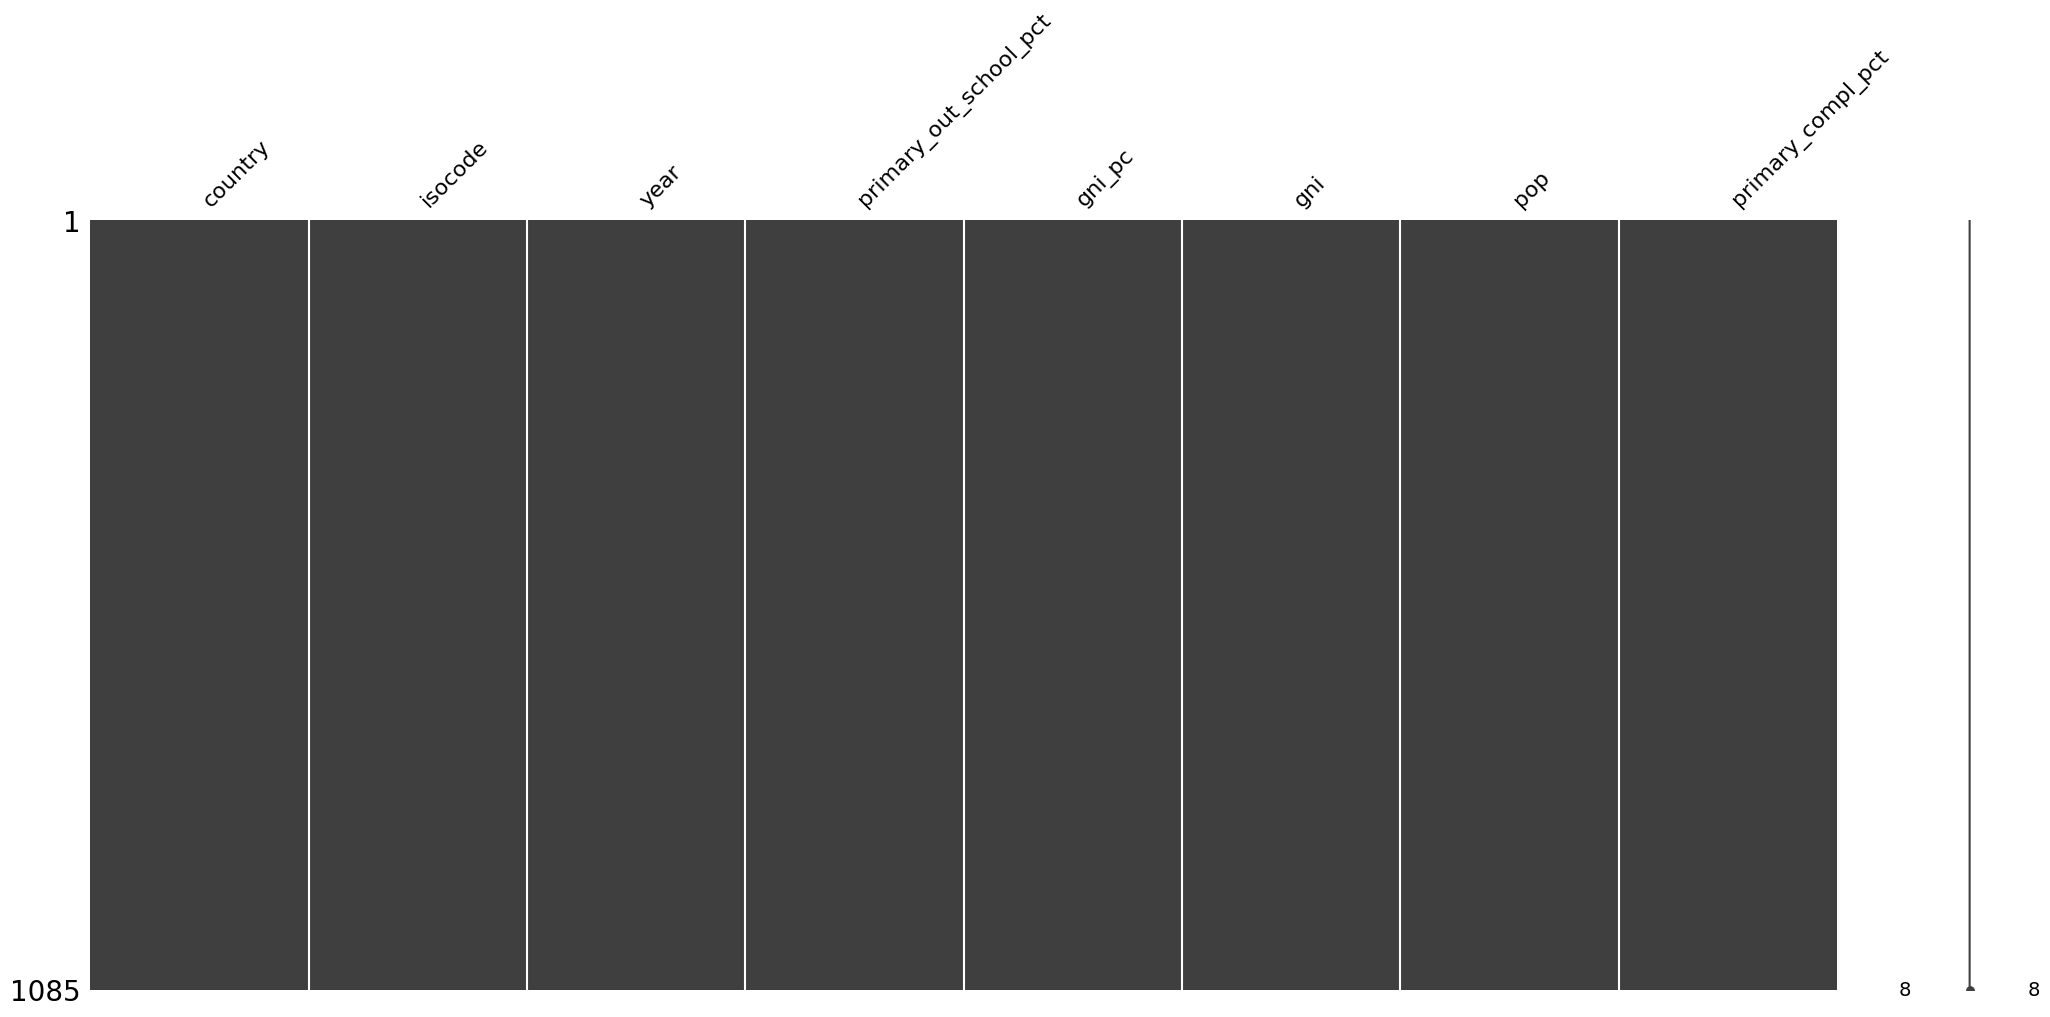

In [29]:
# quick check to see if we really have no missing values - does the below look right?
msno.matrix(df)

df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 1085 non-null   object
 1   isocode                 1085 non-null   object
 2   year                    1085 non-null   object
 3   primary_out_school_pct  603 non-null    object
 4   gni_pc                  962 non-null    object
 5   gni                     962 non-null    object
 6   pop                     1085 non-null   int64 
 7   primary_compl_pct       597 non-null    object
dtypes: int64(1), object(7)
memory usage: 67.9+ KB
None


<Axes: >

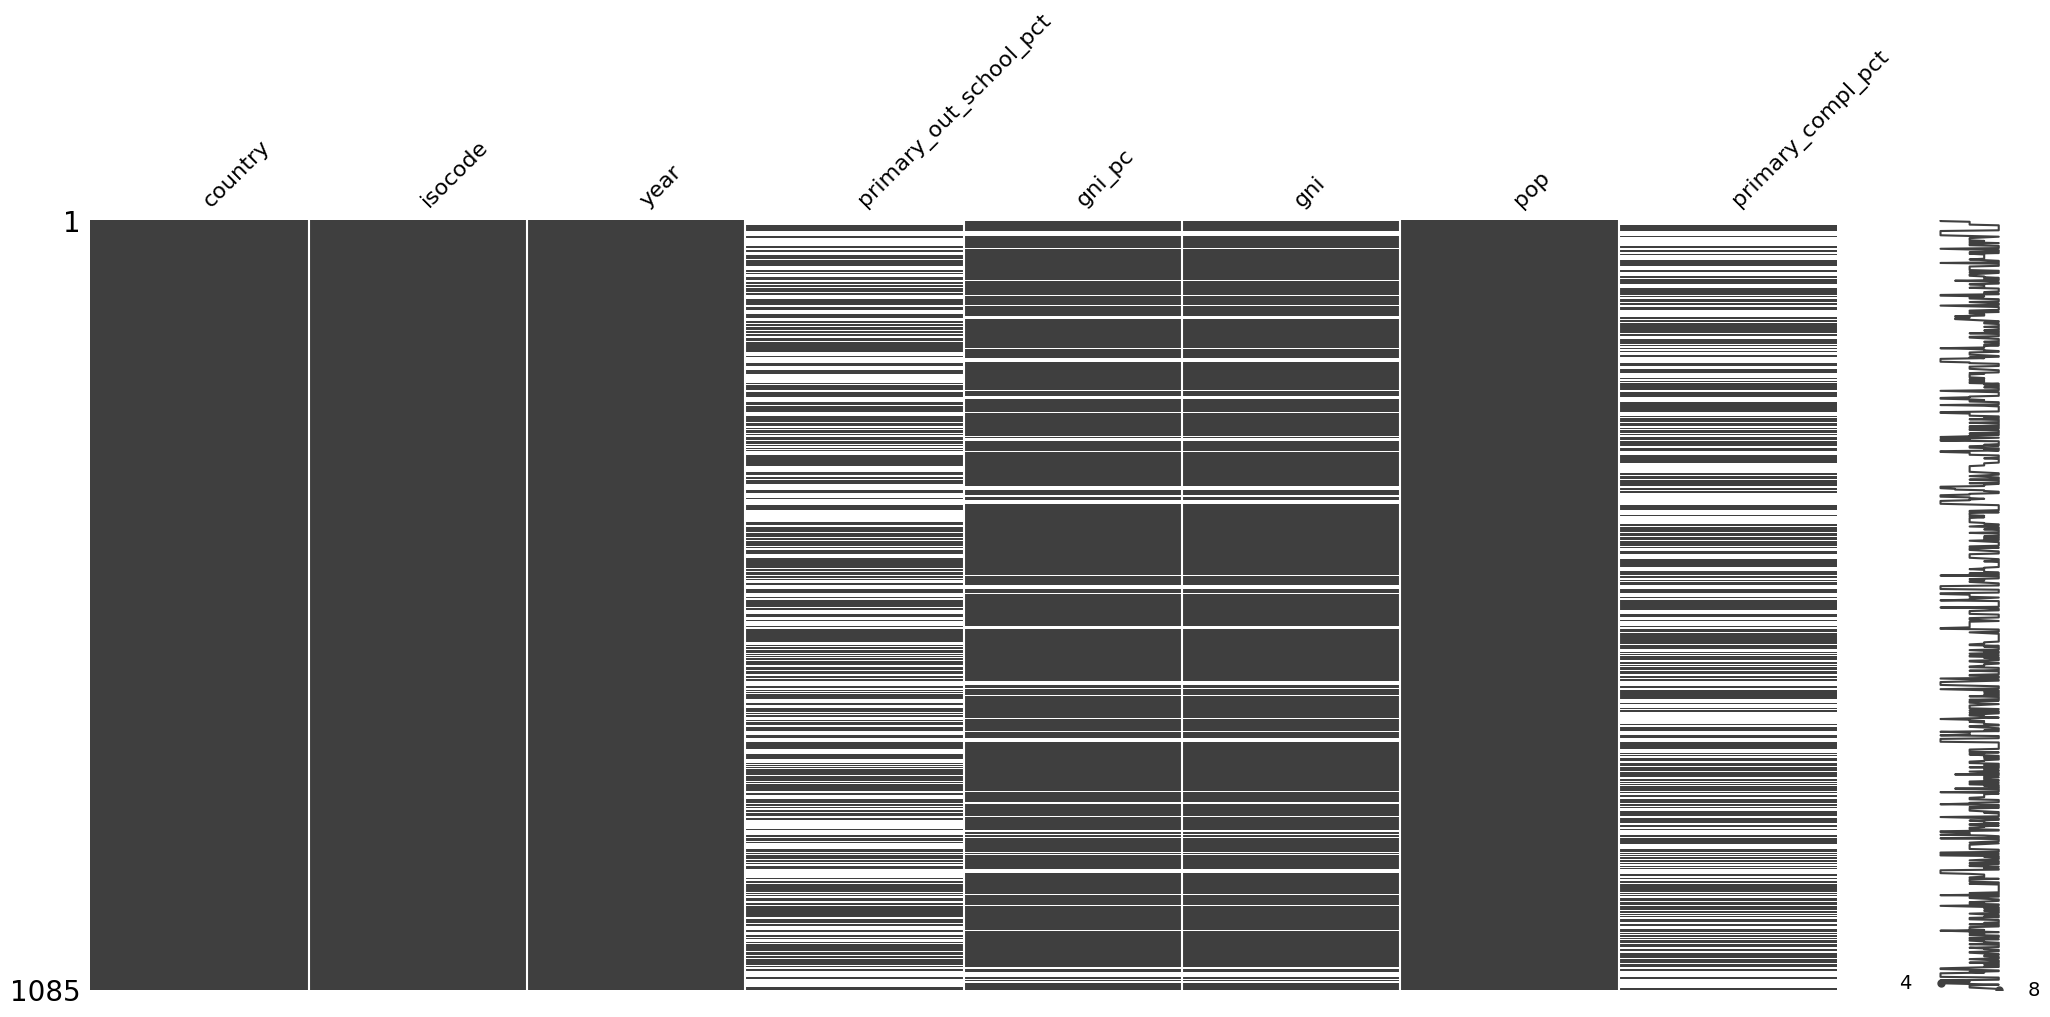

In [32]:
# no... let's try again
df.replace("..", np.nan, inplace=True)
print(df.info())
msno.matrix(df)

In [37]:
# You might want to round primary_out_school_pct and primary_compl_pct to two decimal places
# you should get an error when trying - seek to fix it by using .astype(float)

df['primary_out_school_pct'] = round(df['primary_out_school_pct'].astype(float),2)
df['primary_compl_pct'] = round(df['primary_compl_pct'].astype(float),2)

In [38]:
# what about the other types?

df['primary_out_school_pct'] = df['primary_out_school_pct'].astype(float)
df['primary_compl_pct'] = df['primary_compl_pct'].astype(float)

df['gni_pc'] = df['gni_pc'].astype(float)
df['gni'] = df['gni'].astype(float)

df['year'] = df['year'].astype(int)


### Dealing with missingness

You will learn more sophisticated ways of dealing with missingness through interpolation. Here we simply drop countries for which we do not have a full set of indicators over time. As you can see, that's a big chunk of the data.

<Axes: >

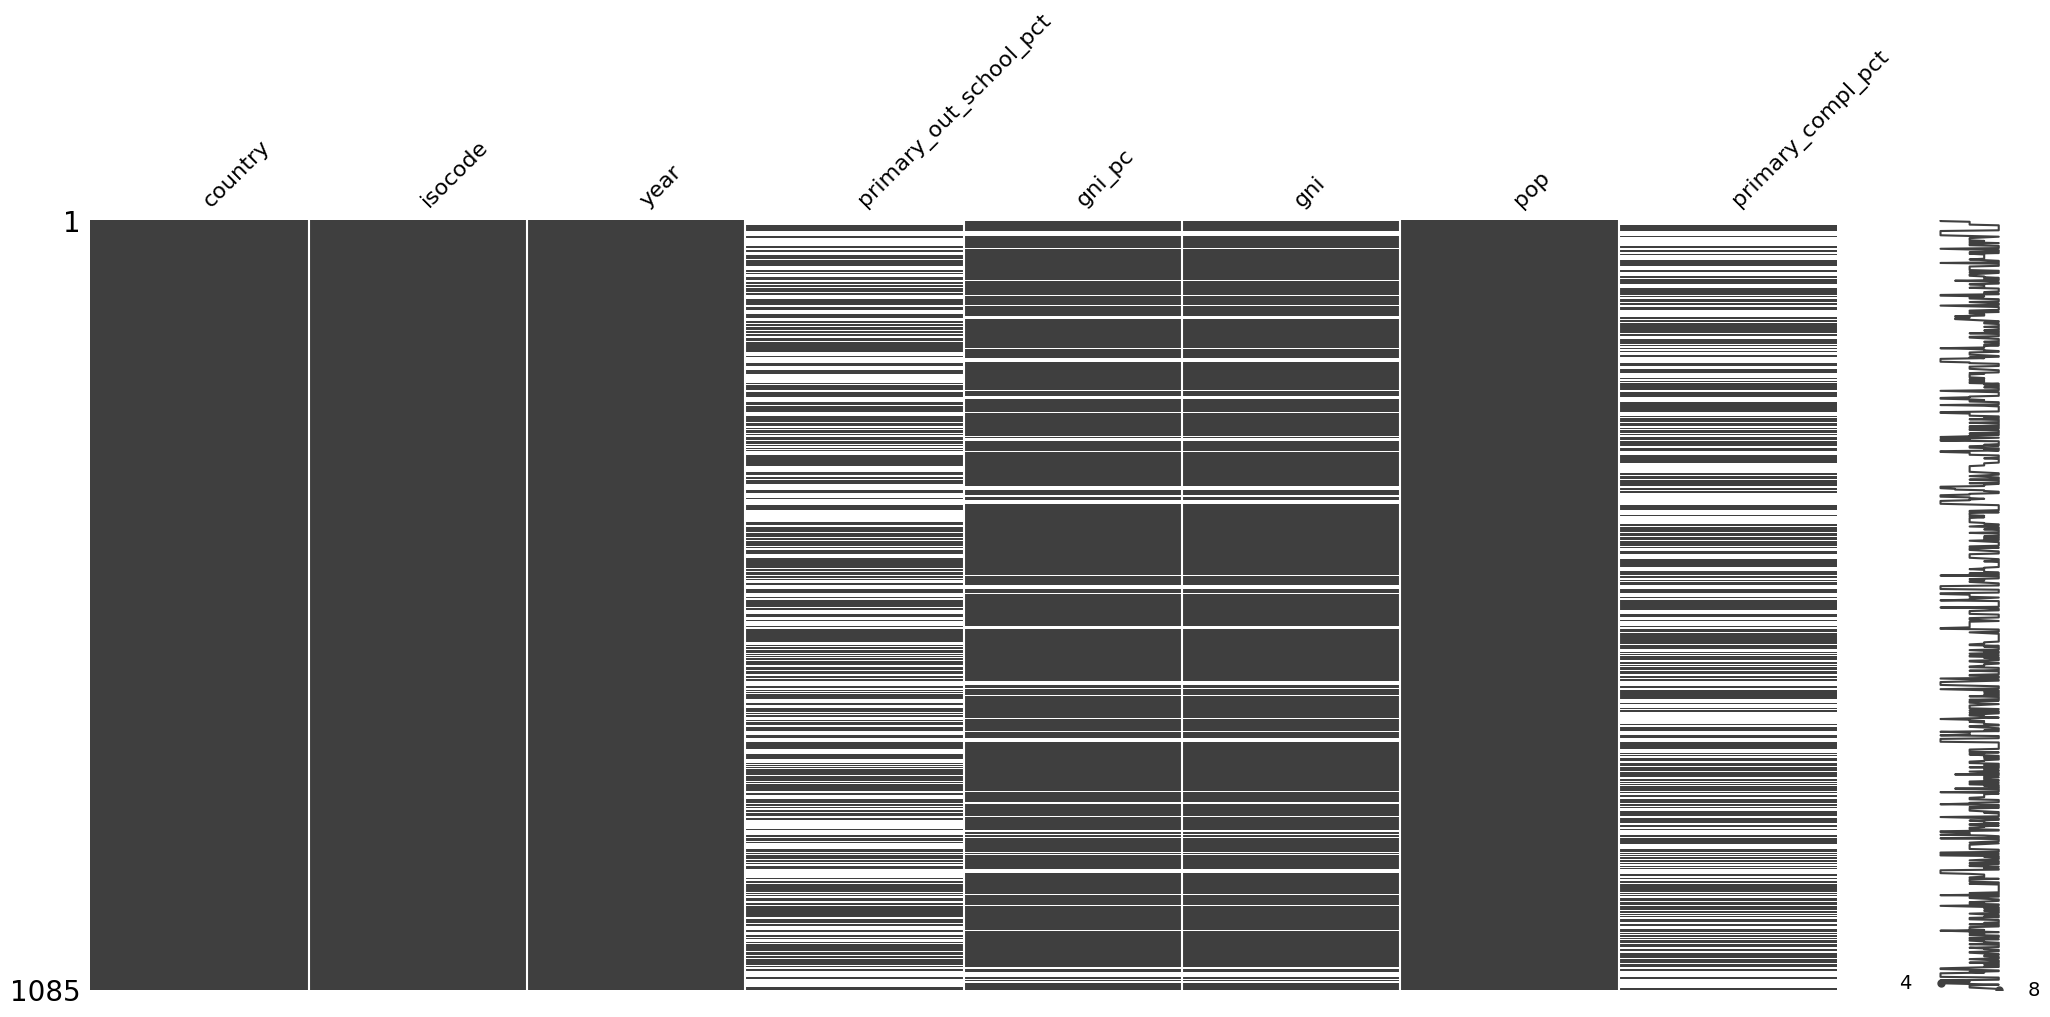

In [39]:
# check which series have the most missingness
msno.matrix(df)

In [40]:
# check out examples of country-years that have the two data points most commonly missing
df.loc[(~df['primary_out_school_pct'].isna()) & (~df['primary_compl_pct'].isna())]

Series Name,country,isocode,year,primary_out_school_pct,gni_pc,gni,pop,primary_compl_pct
7,Albania,ALB,2015,0.21,4410.0,1.271542e+10,2880703,98.79
8,Albania,ALB,2020,3.97,5320.0,1.510352e+10,2837849,99.27
9,Albania,ALB,2022,8.48,6820.0,1.893433e+10,2777689,101.18
10,Algeria,DZA,1990,13.05,2400.0,6.095694e+10,25375810,81.42
11,Algeria,DZA,2000,5.27,1600.0,4.948676e+10,30903893,82.37
...,...,...,...,...,...,...,...,...
1069,West Bank and Gaza,PSE,2022,9.20,4720.0,2.381074e+10,5043612,94.10
1076,Zambia,ZMB,2000,31.68,350.0,3.487044e+09,10017631,60.55
1082,Zimbabwe,ZWE,2015,15.16,1330.0,1.908459e+10,14399013,90.98
1083,Zimbabwe,ZWE,2020,13.57,1690.0,2.626621e+10,15526888,91.87


In [41]:
# committing the drop
df_small = df.dropna()

In [42]:
# checking how many and which countries we have lost
print(df.country.nunique())
print(df_small.country.nunique())

diff_iso = set(df.country) - set(df_small.country)
len(diff_iso)
print(diff_iso)

217
169
{'Lebanon', 'Northern Mariana Islands', 'Congo, Dem. Rep.', 'Monaco', "Korea, Dem. People's Rep.", 'Haiti', 'Libya', 'Bangladesh', 'Belgium', 'Japan', 'Nigeria', 'Comoros', 'New Zealand', 'French Polynesia', 'Curacao', 'Afghanistan', 'Bermuda', 'Netherlands', 'Bahamas, The', 'Liechtenstein', 'Rwanda', 'Channel Islands', 'Angola', 'Virgin Islands (U.S.)', 'Mauritania', 'St. Martin (French part)', 'British Virgin Islands', 'Sint Maarten (Dutch part)', 'Gibraltar', 'Gabon', 'Greenland', 'Guyana', 'Turkmenistan', 'American Samoa', 'Kenya', 'Brazil', 'Papua New Guinea', 'Grenada', 'Congo, Rep.', 'Faroe Islands', 'Somalia', 'Guam', 'Djibouti', 'Australia', 'Kosovo', 'Yemen, Rep.', 'St. Vincent and the Grenadines', 'Isle of Man'}


In [43]:
# this might be a good moment to save the data frame
# that way you don't have to re-run the notebook up to this point each time you want to run the next part (see next notebook)
df_small.to_csv(parent_path + "/brushup_2025/data/WB_reshaped_nomissing.csv")

In [44]:
df_small.columns

Index(['country', 'isocode', 'year', 'primary_out_school_pct', 'gni_pc', 'gni',
       'pop', 'primary_compl_pct'],
      dtype='object', name='Series Name')

In [45]:
# what is happening here? Can you run it twice?
df_small.set_index('isocode', inplace= True)

df_small.columns

Index(['country', 'year', 'primary_out_school_pct', 'gni_pc', 'gni', 'pop',
       'primary_compl_pct'],
      dtype='object', name='Series Name')

In [46]:
print(df_small.index)

Index(['ALB', 'ALB', 'ALB', 'DZA', 'DZA', 'DZA', 'DZA', 'DZA', 'AND', 'ATG',
       ...
       'VNM', 'VNM', 'PSE', 'PSE', 'PSE', 'PSE', 'ZMB', 'ZWE', 'ZWE', 'ZWE'],
      dtype='object', name='isocode', length=488)


In [47]:
# remember a similar cell from above? what has changed?
print(df_small.loc['ZWE']['primary_out_school_pct'][0])
print(type(df_small.loc['ZWE']['primary_out_school_pct'][0]))
print(type(df_small.loc['ZWE']['primary_out_school_pct']))

15.16
<class 'numpy.float64'>
<class 'pandas.core.series.Series'>


C:\Users\eric\AppData\Local\Temp\ipykernel_18560\2266771684.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(df_small.loc['ZWE']['primary_out_school_pct'][0])
C:\Users\eric\AppData\Local\Temp\ipykernel_18560\2266771684.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(type(df_small.loc['ZWE']['primary_out_school_pct'][0]))


In [48]:
# what about here?
df_single_year = df_small.sort_values('year', ascending=False).drop_duplicates('country')
df_single_year

Series Name,country,year,primary_out_school_pct,gni_pc,gni,pop,primary_compl_pct
isocode,,,,,,,
DZA,Algeria,2022,0.63,4430.0,2.014558e+11,45477389,94.71
ZWE,Zimbabwe,2022,5.59,1960.0,3.146984e+10,16069056,86.12
ARG,Argentina,2022,0.75,11820.0,5.368007e+11,45407904,103.23
NOR,Norway,2022,0.95,94290.0,5.145269e+11,5457127,99.28
OMN,Oman,2022,11.06,19270.0,9.115758e+10,4730226,86.59
...,...,...,...,...,...,...,...
TTO,Trinidad and Tobago,2000,2.65,5180.0,6.840974e+09,1319774,91.45
CAN,Canada,2000,0.59,22740.0,6.979092e+11,30685730,98.26
NCL,New Caledonia,1990,6.09,14290.0,2.521873e+09,176456,97.36


In [49]:
df_single_year.tail(5)

Series Name,country,year,primary_out_school_pct,gni_pc,gni,pop,primary_compl_pct
isocode,,,,,,,
TTO,Trinidad and Tobago,2000,2.65,5180.0,6.840974e+09,1319774,91.45
CAN,Canada,2000,0.59,22740.0,6.979092e+11,30685730,98.26
NCL,New Caledonia,1990,6.09,14290.0,2.521873e+09,176456,97.36
CHN,China,1990,8.47,330.0,3.748940e+11,1135185000,106.38
CAF,Central African Republic,1990,42.64,470.0,1.349588e+09,2871910,31.18
